# Manipulacion y representación de señales en Python

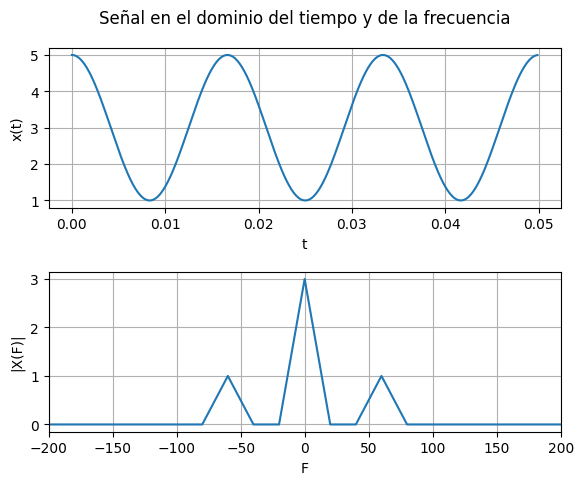

In [167]:
import numpy as np
import matplotlib.pyplot as plt

FS: int = 8000
t = np.arange(0, 0.05, 1/FS )
x = 3 + 2*np.cos(120*np.pi*t)
X = abs(np.fft.fftshift(np.fft.fft(x)))/len(x)
F = ((np.arange(0, len(x)))/len(x)-0.5)*FS


fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t, x)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-200,200])
ax2.grid()

In [119]:
import sounddevice as sd

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished


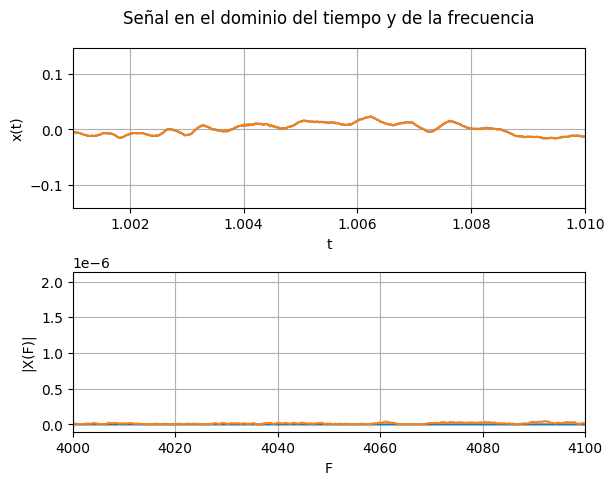

In [120]:
t = np.arange(0, seconds, 1 / fs)
X = np.fft.fftshift(np.abs(np.fft.fft(recording))) / len(recording)
F = ((np.arange(0, len(recording))) / len(recording) - 0.5) * fs

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t, recording)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax1.set_xlim([1.001, 1.01])
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([4000,4100])
ax2.grid()

In [121]:
sd.playrec(recording, fs, 1)
sd.wait()

In [18]:
inverted = - recording
sd.playrec(inverted, fs, 2)
sd.wait()

In [75]:
saturated = 100 * recording
sd.playrec(saturated, fs, 2)
sd.wait()

# Conversion D/A: Reconstruccion de señales a partir de sus muestras

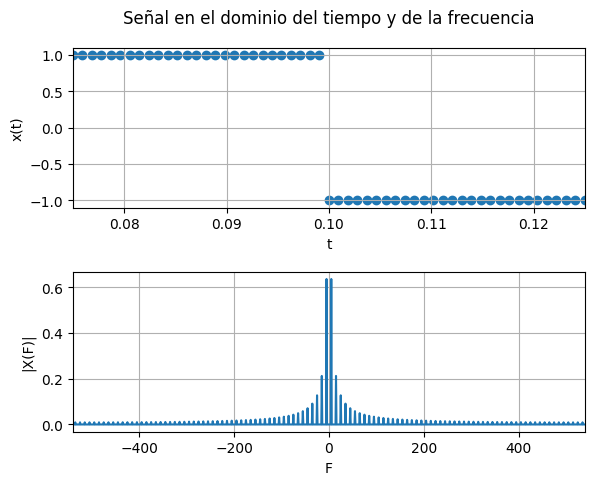

In [85]:
from scipy import signal


FS = 1080
t = np.arange(0, 1, 1 / FS)
F = 60

x = signal.square(2 * np.pi * 5 * t)

X = abs(np.fft.fftshift(np.fft.fft(x))) / len(x)
F = ((np.arange(0, len(x))) / len(x) - 0.5) * FS

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.scatter(t, x)
ax1.set_xlim([0.075, 0.125])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-FS/2, FS/2])
ax2.grid()

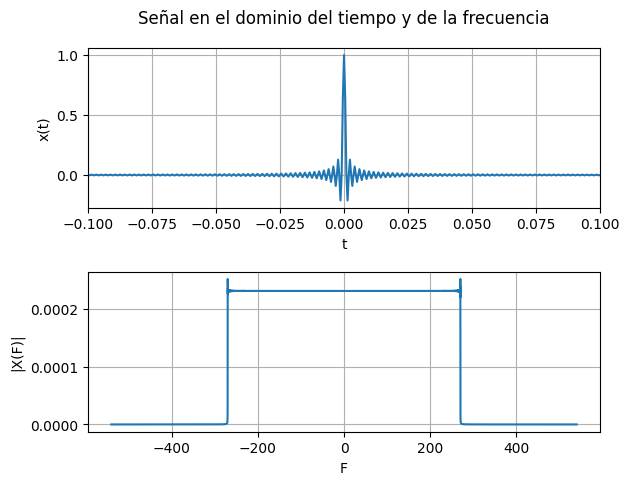

In [92]:
t_gen = np.arange(-2, 2, 1 / (2*FS))

generator_signal = np.sin(FS * t_gen * np.pi) / (FS * t_gen * np.pi)

X = abs(np.fft.fftshift(np.fft.fft(generator_signal))) / len(generator_signal)
F = ((np.arange(0, len(generator_signal))) / len(generator_signal) - 0.5) * FS

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t_gen, generator_signal)
ax1.set_xlim([-0.1, 0.1])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-1.1* FS / 2, 1.1 * FS / 2])
ax2.grid()

C:\Users\Andres\AppData\Local\Temp\ipykernel_4232\2738628578.py:6: RuntimeWarning: invalid value encountered in scalar divide
  sum += _x * np.sin(FS * (_t - index / FS)* np.pi) / (FS *(_t - index / FS) * np.pi)


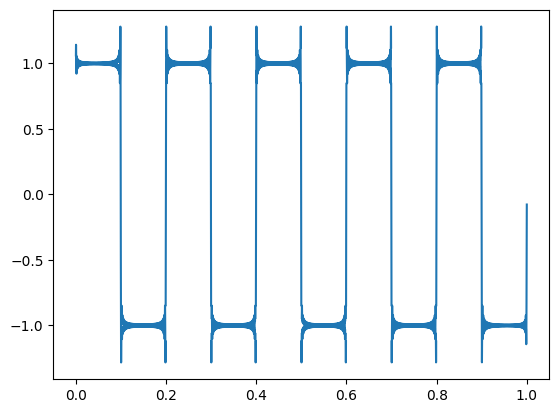

In [94]:
x_reconstructed = []
t_rec = np.arange(0, 1, 1 / (10*FS))
for _t in t_rec:
    sum = 0
    for index, _x in enumerate(x):
        sum += _x * np.sin(FS * (_t - index / FS)* np.pi) / (FS *(_t - index / FS) * np.pi)
    x_reconstructed.append(sum)
plt.plot(t_rec, x_reconstructed)

# Procesamiento de pantalla verde

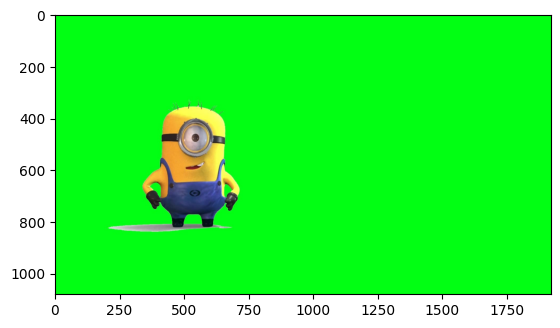

In [1]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("./green_screen.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

[]

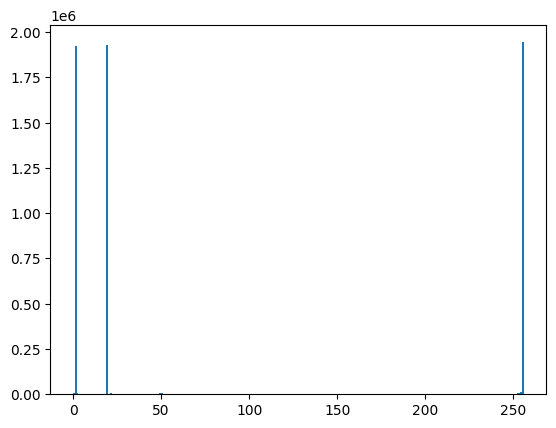

In [4]:
plt.hist(img.ravel(), 256, [0, 256])   
plt.plot()

(0.0, 5000.0)

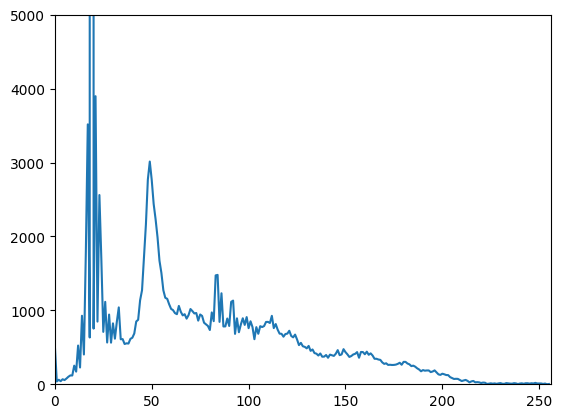

In [26]:

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# ax1.hist(b.ravel(), 256, [0, 256])
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

fig, ax = plt.subplots()
ax.plot(hist)
ax.set_xlim([0, 256])
ax.set_ylim([0, 5000])
# ax2.hist(g.ravel(), 256, [0, 256])
# ax3.hist(r.ravel(), 256, [0, 256])
# plt.show()

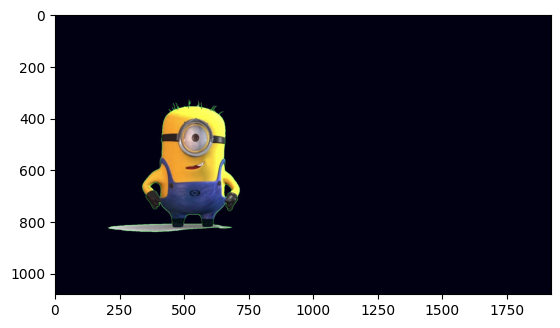

In [13]:
b, g, r = cv2.split(img)
img[:, :][(g > 200) & (r < 50)] = [0,0,0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

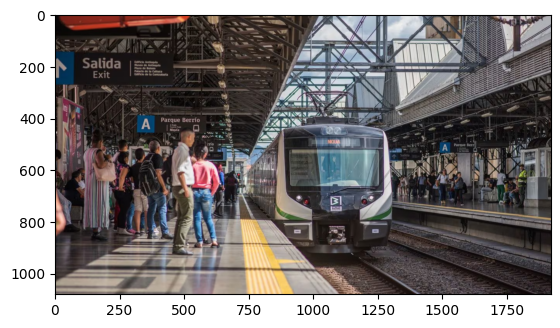

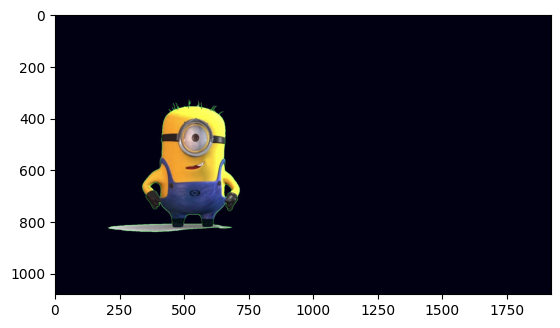

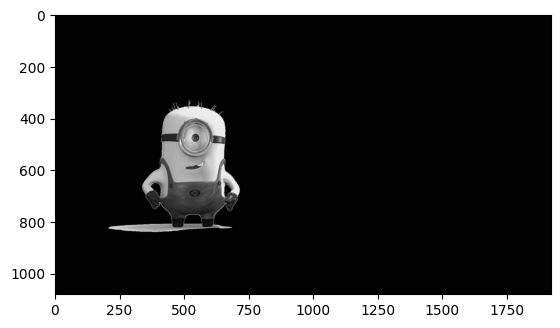

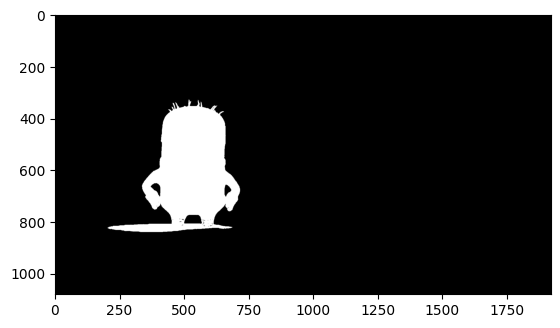

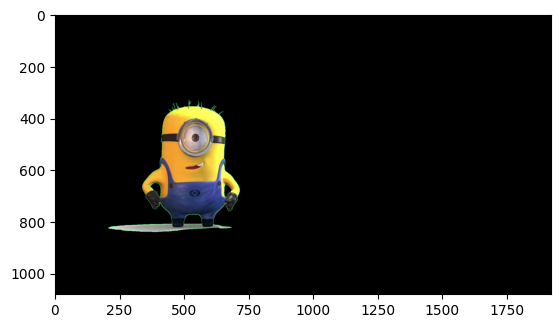

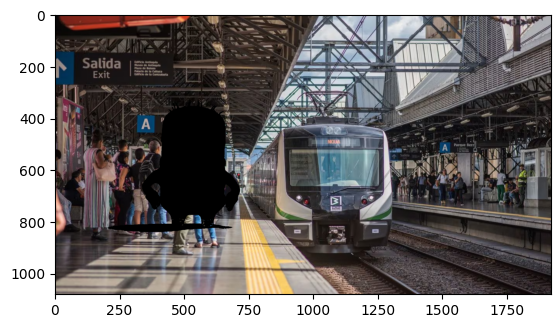

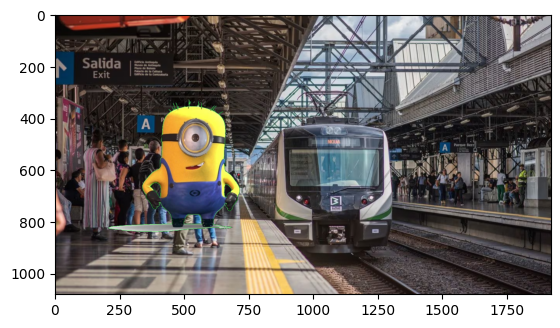

In [9]:
background = cv2.imread("./background.jpg")
background = cv2.resize(background, (img.shape[1], img.shape[0]))
plt.subplots()
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

plt.subplots()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# I want to put logo on top-left corner, So I create a ROI
rows, cols, channels = background.shape

# Now create a mask of logo and create its inverse mask also
plt.subplots()
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img2gray, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)

# Window shown waits for any key pressing event
plt.subplots()
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap="gray")
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
plt.subplots()
img1_fg = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(img1_fg, cv2.COLOR_BGR2RGB))


# Take only region of logo from logo image.
img2_bg = cv2.bitwise_and(background, background, mask=mask_inv)
plt.subplots()
plt.imshow(cv2.cvtColor(img2_bg, cv2.COLOR_BGR2RGB))
# # Put logo in ROI and modify the main image
dst = cv2.add(img1_fg, img2_bg)
plt.subplots()
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
#img[0:rows, 0:cols] = dst

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
import cv2


cap = cv2.VideoCapture("video_green_screen.mp4")
ret, frame = cap.read()
while 1:
    ret, frame = cap.read()
    
    try:
        cv2.imshow("frame", frame)
    except: 
        pass
    if cv2.waitKey(1) & 0xFF == ord("q") or ret == False:
        cap.release()
        cv2.destroyAllWindows()
        break

In [26]:
cap = cv2.VideoCapture("video_green_screen.mp4")
ret, frame = cap.read()
while 1:
    ret, frame = cap.read()

    try:
        b, g, r = cv2.split(frame)
        frame[:, :][(g > 100) & (b < 50)] = [0,0,0]
        cv2.imshow("frame", frame)
    except:
        pass
    if cv2.waitKey(1) & 0xFF == ord("q") or ret == False:
        cap.release()
        cv2.destroyAllWindows()
        break

In [27]:
cap = cv2.VideoCapture("video_green_screen.mp4")
ret, frame = cap.read()
background = cv2.imread("./background.jpg")
while 1:
    ret, frame = cap.read()

    try:
        b, g, r = cv2.split(frame)
        frame[:, :][(g > 100) & (b < 50)] = [0,0,0]

        img2gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Window shown waits for any key pressing event
        ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)
        # Now black-out the area of logo in ROI
        img1_fg = cv2.bitwise_and(frame, frame, mask=mask)
        # Take only region of logo from logo image.
        img2_bg = cv2.bitwise_and(background, background, mask=mask_inv)
        # # Put logo in ROI and modify the main image
        dst = cv2.add(img1_fg, img2_bg)
        cv2.imshow("frame", dst)

    except:
        pass
    if cv2.waitKey(1) & 0xFF == ord("q") or ret == False:
        cap.release()
        cv2.destroyAllWindows()
        break

# Simulación de la Localizacion Binaural

In [126]:
import numpy as np
import sounddevice as sd

# Define the audio sample
fs = 44100  # Sample rate
seconds = 3  # Duration of recording

audio_sample = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

# Define the binaural location parameters


In [152]:
azimuth = 90  # Azimuth angle in degrees (-90 to 90)
elevation = 0  # Elevation angle in degrees (-90 to 90)
distance = 5  # Distance in meters (0 to infinity)

# Calculate the interaural time difference (ITD) based on the azimuth angle
speed_of_sound = 343  # Speed of sound in meters per second
head_radius = 0.09  # Average head radius in meters
itd = head_radius * np.sin(np.radians(azimuth)) / speed_of_sound

# Calculate the interaural level difference (ILD) based on the distance
ild = 20 * np.log10(1 / distance)

# Apply the binaural location effect to the audio sample
left_channel = np.roll(audio_sample, int(itd * 44100))
right_channel = np.roll(audio_sample, -int(itd * 44100))
right_channel *= 10 ** (ild / 20)
left_channel *= 10 ** (ild / 20)
# Combine the left and right channels into a stereo audio signal
stereo_signal = np.column_stack((left_channel, right_channel))

# Play the stereo audio signal
sd.playrec(stereo_signal, samplerate=44100, channels=2)
sd.wait()

# Series de Fourier

c:\Program Files\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Program Files\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


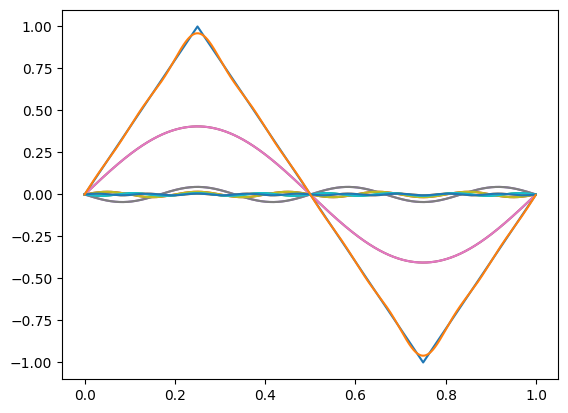

In [165]:
import scipy as sp
import numpy as np 
import matplotlib.pyplot as plt

t = np.arange(0, 1, 1/1000)

triangle_signal = sp.signal.sawtooth((2 * np.pi) * t + np.pi / 2, 0.5)
plt.plot(t, triangle_signal)


harmonics = []
coefficients = []
for k in range(-10,10):
    if k != 0 and k % 2 != 0:
        coefficients.append( 1j*(-1)**k *4 / (np.pi**2 * k**2) * np.sin(k* np.pi/2))
        harmonics.append( 1j*(-1)**k *4 / (np.pi**2 * k**2) * np.sin(k* np.pi/2)*(np.exp(1j * 2 * np.pi * k * t)))
for harmonic in harmonics:
    plt.plot(t, harmonic)   
plt.plot(t, sum(harmonics))
plt.show()

[-0.-0.40528473j  0.+0.04503164j -0.-0.01621139j  0.+0.00827112j
 -0.-0.00500352j  0.+0.00500352j -0.-0.00827112j  0.+0.01621139j
 -0.-0.04503164j  0.+0.40528473j]
[-0.-0.40528607j  0.+0.04503297j -0.-0.01621272j  0.+0.00827245j
 -0.-0.00500485j  0.+0.00335079j -0.-0.00239947j  0.+0.0018026j
 -0.-0.0014037j   0.+0.00112401j -0.-0.00112401j  0.+0.0014037j
 -0.-0.0018026j   0.+0.00239947j -0.-0.00335079j  0.+0.00500485j
 -0.-0.00827245j  0.+0.01621272j -0.-0.04503297j  0.+0.40528607j]


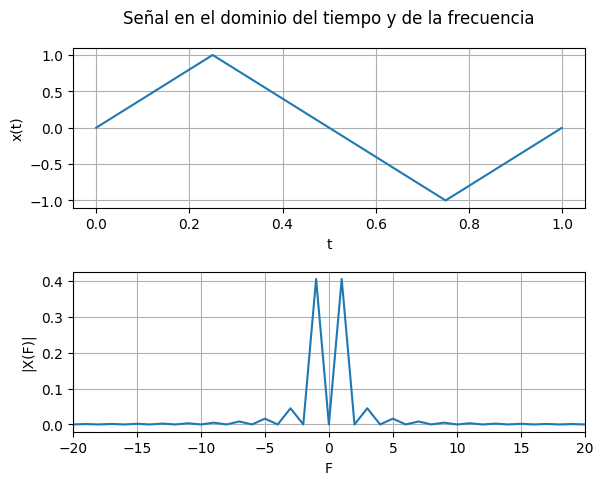

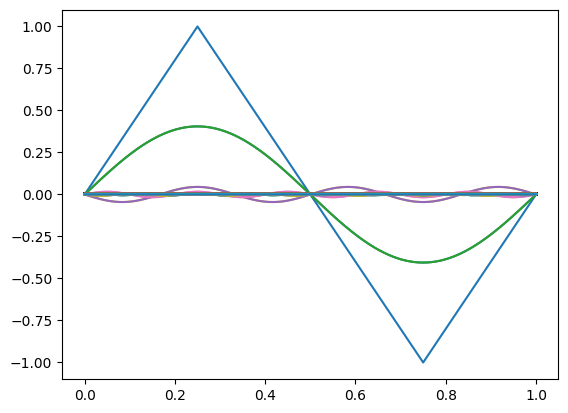

In [166]:
X = np.fft.fftshift(np.fft.fft(triangle_signal))/len(triangle_signal)
F = ((np.arange(0, len(triangle_signal)))/len(triangle_signal)-0.5)*1000
print(1j*np.imag(np.fft.fftshift(coefficients)))
Xunshifted = np.fft.fft(triangle_signal)/len(triangle_signal)
print(1j * np.imag(Xunshifted[abs(Xunshifted) > 1e-3]))

harmonics = []

Xfiltered = X[abs(X) > 1e-3]
terms = list(range(-len(Xunshifted) // 2, len(Xunshifted) // 2))

for index, k in enumerate(X):
    harmonics.append(k * (np.exp(1j * 2 * np.pi * terms[index] * t)))


fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t, triangle_signal)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, abs(X))
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-20,20])
ax2.grid()


plt.subplots()
plt.plot(t, sum(harmonics))
for harmonic in harmonics:
    plt.plot(t, harmonic)